In [1]:
# Установка transformers
!pip install transformers

In [2]:
#Установка catboost
!pip install catboost

In [3]:
import pandas as pd
from itertools import groupby

In [4]:
#import необходимых модулей

import pandas as pd
import yaml
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from catboost import CatBoostClassifier, Pool
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [5]:
#Считывание данных в DataFrame 


train= pd.read_csv('/kaggle/input/pochtarossii/train_cluster_1half.csv', sep=',', index_col=None)
train=train.fillna(0)
test= pd.read_csv('/kaggle/input/pochtarossii/test_claster.csv', sep=',', index_col=None)
test=test.fillna(0)

In [6]:
train['index_oper']=train['index_oper'].astype(str)
test['index_oper']=test['index_oper'].astype(str)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070979 entries, 0 to 3070978
Data columns (total 32 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   label                           int64 
 1   Кластер total_qty_over_index    int64 
 2   Кластер оплата транспорта       int64 
 3   Кластер total_qty_oper_login_1  int64 
 4   Кластер dist_qty_oper_login_1   int64 
 5   Кластер total_qty_oper_login_0  int64 
 6   total_qty_oper_login_0          int64 
 7   Кластер вес mfi                 int64 
 8   Кластер цена mfi                int64 
 9   Кластер вес                     int64 
 10  oper_type + oper_attr           object
 11  id                              int64 
 12  index_oper                      object
 13  type                            object
 14  priority                        int64 
 15  is_privatecategory              object
 16  class                           int64 
 17  is_in_yandex                    object
 18  is

In [8]:
train

,label,Кластер total_qty_over_index,Кластер оплата транспорта,Кластер total_qty_oper_login_1,Кластер dist_qty_oper_login_1,Кластер total_qty_oper_login_0,total_qty_oper_login_0,Кластер вес mfi,Кластер цена mfi,Кластер вес,oper_type + oper_attr,id,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,mailtype,mailctg,mailrank,directctg,postmark,name_mfi,total_qty_over_index_and_type,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,oper_type,oper_attr
0,0,1,0,1,0,2,58950,1,9,3,1043_-1,6818780,628629,Участок,7503,N,0,Y,N,5,1,0,2,0,"Fishhook,USB",779126,0,0,0,0,1043,1
1,0,0,0,0,1,4,83318932,2,0,3,1023_-1,9907176,102976,ММПО,7503,N,0,N,N,5,1,0,2,0,"screen protector,Case(Q613B),case(208B40-DB)",132175590,0,0,0,0,1023,1
2,0,3,0,5,8,2,3233068,2,9,1,1018_-1,3304275,620962,Цех,7503,N,0,Y,N,5,1,0,2,0,"Pendant Necklaces,Rings for Women,Necklaces",6479360,0,1,0,0,1018,1
3,0,9,6,6,8,2,653280,1,7,6,1019_-1,9020937,344964,Цех,7503,N,0,Y,N,5,1,0,2,0,Motorcycle Signal Lamp,2714208,0,0,0,0,1019,1
4,0,1,5,9,3,2,27911,8,8,10,1020_-1,3082311,629819,Участок,7503,N,0,Y,N,5,1,0,2,0,backpack,344830,0,0,0,0,1020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070974,1,0,6,0,1,4,83318932,5,0,10,1004_-1,1355531,102976,ММПО,7503,N,0,N,N,5,1,0,2,0,Storage Holders & Racks,132175590,0,0,0,0,1004,1
3070975,1,1,5,7,3,2,7199,1,0,0,2_1,4197571,676850,ГОПС,7506,N,2,Y,N,5,1,0,2,0,DIY module,25571,0,0,0,0,2,1
3070976,1,5,0,2,1,0,91123247,1,7,1,1004_-1,2676188,102976,ММПО,7503,N,0,N,N,5,1,0,2,0,glass,159889293,0,0,0,0,1004,1
3070977,1,1,0,7,3,2,2420,5,8,6,2_1,6324167,603128,ГОПС,7504,N,3,Y,N,5,1,0,2,0,"Key Chains,3d night light(1005003005442825)",6337,0,0,0,0,2,1


In [9]:
test

,label,Кластер total_qty_over_index,Кластер оплата транспорта,Кластер total_qty_oper_login_1,Кластер dist_qty_oper_login_1,Кластер total_qty_oper_login_0,total_qty_oper_login_0,Кластер вес mfi,Кластер цена mfi,Кластер вес,oper_type + oper_attr,id,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,mailtype,mailctg,mailrank,directctg,postmark,name_mfi,total_qty_over_index_and_type,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,oper_type,oper_attr
0,?,5,0,2,1,0,91123247,2,0,3,8_13,7815282,102976,ММПО,7503,N,0,N,N,5,1,0,2,0,"Screen Protectors,protective case",159889293,0,0,0,0,8,13
1,?,1,0,7,3,2,1545,1,9,1,8_2,8443555,238753,ГОПС,7503,N,4,Y,N,5,0,0,2,0,String Iron Block,4440,0,1,1,0,8,2
2,?,1,7,7,3,2,993,0,0,6,1020_-1,6352559,618254,ГОПС,7503,N,4,Y,N,5,1,0,2,0,Jackets,3744,0,0,0,0,1020,1
3,?,1,3,4,8,2,2267333,1,7,11,1016_-1,4921420,102968,ТИ,7503,N,0,N,N,5,1,0,2,0,0,11646942,0,1,0,0,1016,1
4,?,3,9,2,2,2,8747,7,8,0,1018_-1,1420440,102971,Цех,7506,N,0,N,N,5,1,0,2,0,"Unisex Boots,Boots",76146936,0,1,0,0,1018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,?,1,0,7,3,2,1803,2,9,1,1017_1001,9030800,655003,ГОПС,7503,N,4,Y,N,5,1,0,2,0,"solder tool(jsd-40a),Keyboard light",6100,0,0,0,0,1017,1001
3999996,?,0,7,0,1,4,83318932,1,7,5,1023_-1,6275048,102976,ММПО,7503,N,0,N,N,5,1,0,2,0,0,132175590,0,1,0,0,1023,1
3999997,?,9,5,4,5,2,3469387,9,9,10,1022_-1,4701757,102969,ТИ,7503,N,0,N,N,5,1,0,2,0,Men Shoes,20817461,0,1,0,0,1022,1
3999998,?,1,0,7,3,8,13673720,5,0,5,39_-1,611153,104006,Участок,7503,N,0,N,N,5,1,0,2,0,Dresses,13673735,0,0,0,0,39,1


In [10]:
train.columns

Index(['label', 'Кластер total_qty_over_index', 'Кластер оплата транспорта',
       'Кластер total_qty_oper_login_1', 'Кластер dist_qty_oper_login_1',
       'Кластер total_qty_oper_login_0', 'total_qty_oper_login_0',
       'Кластер вес mfi', 'Кластер цена mfi', 'Кластер вес',
       'oper_type + oper_attr', 'id', 'index_oper', 'type', 'priority',
       'is_privatecategory', 'class', 'is_in_yandex', 'is_return', 'mailtype',
       'mailctg', 'mailrank', 'directctg', 'postmark', 'name_mfi',
       'total_qty_over_index_and_type', 'is_wrong_sndr_name',
       'is_wrong_rcpn_name', 'is_wrong_phone_number', 'is_wrong_address',
       'oper_type', 'oper_attr'],
      dtype='object')

In [11]:
columns_to_train=['oper_type', 'oper_attr','oper_type + oper_attr', 'Кластер вес',   'name_mfi',
       'index_oper', 'Кластер total_qty_over_index', 
       'Кластер оплата транспорта', 'Кластер dist_qty_oper_login_1',
       'Кластер total_qty_oper_login_1', 'Кластер total_qty_oper_login_0',
       'Кластер вес mfi', 'Кластер цена mfi','type', 'priority',
       'is_privatecategory', 'class', 'is_in_yandex', 'is_return','mailtype', 'mailctg', 'mailrank', 'directctg', 
       'postmark', 'is_wrong_sndr_name', 'is_wrong_rcpn_name','is_wrong_phone_number', 'is_wrong_address',
]

In [12]:
# выбираем поля для нейросети СatBoost
# Общий трейн (для дальнейшего прогноза)
X_train_all=train[columns_to_train]
y_train_all=train[['label']]


In [13]:
testnet=test[columns_to_train]

In [14]:
# Определяем веса для классов кластеров для подвыборки 1
classes = np.unique(y_train_all)
weights = compute_class_weight(class_weight='balanced', classes = np.unique(y_train_all), y = np.ravel(y_train_all))
class_weights = dict(zip(classes, weights))
class_weights

{0: 0.5294793205101105, 1: 8.980521113580537}

In [15]:
#Обучаем 
pool_train_solution = Pool(X_train_all, y_train_all,cat_features = ['Кластер вес', 
       'index_oper', 'Кластер total_qty_over_index','oper_type', 'oper_attr','oper_type + oper_attr',
       'Кластер оплата транспорта', 'Кластер dist_qty_oper_login_1',
       'Кластер total_qty_oper_login_1', 'Кластер total_qty_oper_login_0',
       'Кластер вес mfi', 'Кластер цена mfi','type', 'priority',
       'is_privatecategory', 'class', 'is_in_yandex', 'is_return','mailtype', 'mailctg', 'mailrank', 'directctg', 
       'postmark', 'is_wrong_sndr_name', 'is_wrong_rcpn_name','is_wrong_phone_number', 'is_wrong_address'], text_features = ['name_mfi'])
#pool_test_solution = Pool(X_test,y_test)
testnet_solution = Pool(testnet, cat_features = ['Кластер вес', 
       'index_oper', 'Кластер total_qty_over_index','oper_type', 'oper_attr','oper_type + oper_attr',
       'Кластер оплата транспорта', 'Кластер dist_qty_oper_login_1',
       'Кластер total_qty_oper_login_1', 'Кластер total_qty_oper_login_0',
       'Кластер вес mfi', 'Кластер цена mfi','type', 'priority',
       'is_privatecategory', 'class', 'is_in_yandex', 'is_return','mailtype', 'mailctg', 'mailrank', 'directctg', 
       'postmark', 'is_wrong_sndr_name', 'is_wrong_rcpn_name','is_wrong_phone_number', 'is_wrong_address'], text_features = ['name_mfi'])

model_test_1 = CatBoostClassifier(iterations=150,  task_type='GPU',devices='0',depth=10, verbose =True, random_seed=45, learning_rate=0.5,
                               leaf_estimation_method= 'Gradient',bootstrap_type= 'Poisson',objective='MultiClass',eval_metric = 'Accuracy',loss_function='MultiClass', class_weights=class_weights)
model_test_1.fit(pool_train_solution,verbose=True)
#model_test.fit(pool_train_solution,eval_set=pool_test_solution,verbose=True,early_stopping_rounds=50 )



0:	learn: 0.9757727	total: 347ms	remaining: 51.8s
1:	learn: 0.9761584	total: 675ms	remaining: 50s
2:	learn: 0.9763792	total: 1.08s	remaining: 52.9s
3:	learn: 0.9765141	total: 1.38s	remaining: 50.4s
4:	learn: 0.9766211	total: 1.67s	remaining: 48.3s
5:	learn: 0.9766692	total: 1.99s	remaining: 47.8s
6:	learn: 0.9766735	total: 2.33s	remaining: 47.6s
7:	learn: 0.9766937	total: 2.69s	remaining: 47.7s
8:	learn: 0.9766972	total: 2.94s	remaining: 46.1s
9:	learn: 0.9767469	total: 3.28s	remaining: 46s
10:	learn: 0.9767568	total: 3.6s	remaining: 45.5s
11:	learn: 0.9767799	total: 3.81s	remaining: 43.8s
12:	learn: 0.9767980	total: 3.98s	remaining: 42s
13:	learn: 0.9768118	total: 4.4s	remaining: 42.7s
14:	learn: 0.9768135	total: 4.58s	remaining: 41.2s
15:	learn: 0.9768308	total: 4.85s	remaining: 40.6s
16:	learn: 0.9768533	total: 5.09s	remaining: 39.8s
17:	learn: 0.9768530	total: 5.29s	remaining: 38.8s
18:	learn: 0.9768628	total: 5.45s	remaining: 37.6s
19:	learn: 0.9768855	total: 5.81s	remaining: 37.8

In [16]:
# предварительный тест схождения на всем обучающем множестве
y_pred = model_test_1.predict(X_train_all)
#сохранение модели
model_test_1.save_model('catboost_model ver 74.bin')

In [17]:
print("Значение метрики recall на трейне : ", recall_score(y_train_all, y_pred, average='macro', zero_division=0))

Значение метрики recall на трейне :  0.9776266064685871


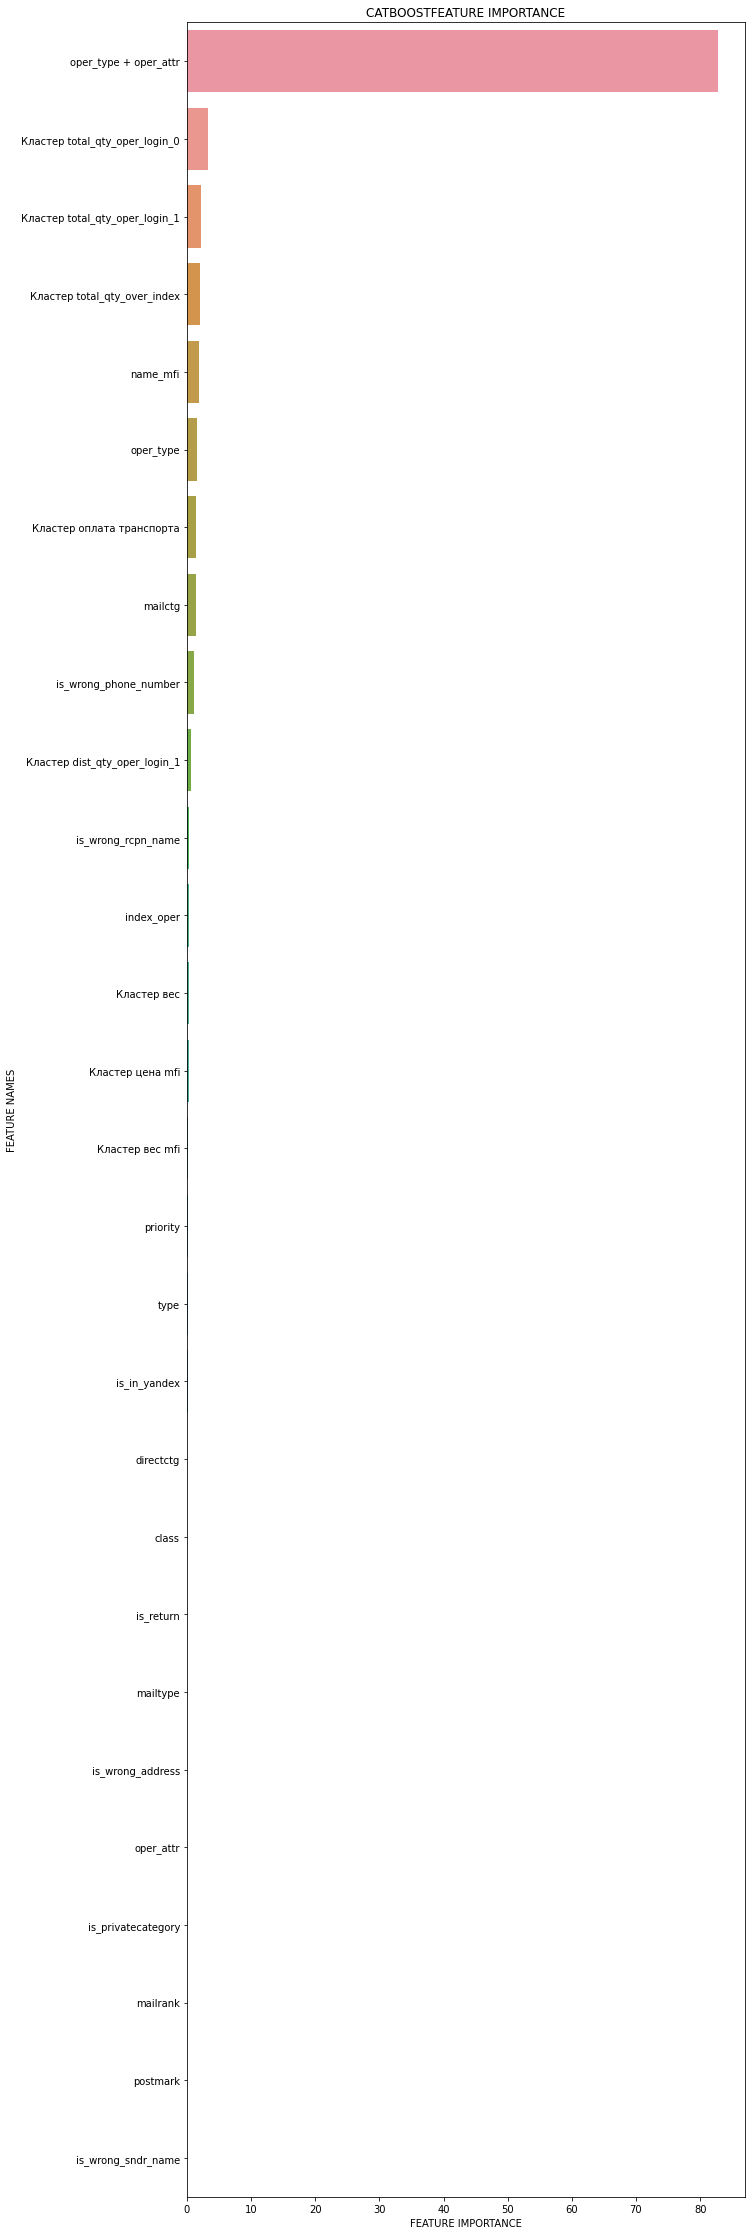

In [18]:
# Значимость признаков CatBoost в модели прогностики

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,40))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

#plot the catboost result
plot_feature_importance(model_test_1.get_feature_importance(),X_train_all.columns,'CATBOOST')

In [19]:
#Получение ответов
y_pred_solution = model_test_1.predict(testnet_solution)

In [20]:
# Заводим результаты в тест
test['label']=y_pred_solution
test['label'].value_counts()

0    3722667
1     277333
Name: label, dtype: int64

In [21]:
prognoz_itog=test[['id','label']]
prognoz_itog

,id,label
0,7815282,0
1,8443555,0
2,6352559,0
3,4921420,0
4,1420440,0
...,...,...
3999995,9030800,0
3999996,6275048,0
3999997,4701757,0
3999998,611153,0


In [22]:
prognoz_itog.to_csv('Почта catboost cluster 1half ver 74.csv', sep=',', index=False,line_terminator='\n')